# Imports

In [1003]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15.0, 7.0)
sns.set(style="ticks")

# Helper Functions

In [1004]:
def df_ols(df, y, x):
    for var in [x, y]:
        if not hasattr(var, '__iter__'):
            var = [var]
    return pd.ols(y=df[y], x=df[x])

In [1005]:
def fix_issue_date(x):
    try:
        return pd.Period(datetime.datetime.strptime(str(x), '%b-%y'), 'M')
    except: 
        return None

# Load in data (currently using 2007-2011)

In [1006]:
downloads = '/Users/thegator12321/Downloads/'

In [1007]:
current = pd.read_csv('{}{}'.format(downloads,'primaryMarketNotes-browseNotes_1-RETAIL (1).csv'))

In [1008]:
historic = pd.read_csv('{}{}'.format(downloads, 'LoanStats3a.csv'))

In [1009]:
historic = historic.iloc[historic['issue_d'].dropna().index, :]
historic['loan_status'] = historic['loan_status'].str.replace('Does not meet the credit policy. Status:', '')
historic = historic.reset_index(drop=True)
# historic['issue_d'] = historic['issue_d'].map(fix_issue_date)

In [1010]:
historic['loan_status'].value_counts()

Fully Paid            34139
Charged Off            6335
Current                1960
Late (31-120 days)       51
In Grace Period          28
Late (16-30 days)        13
Default                   9
Name: loan_status, dtype: int64

In [1011]:
historic[historic['loan_status'] == 'Fully Paid'][historic['issue_d'] == pd.Period('2011-11')].iloc[:, 0:20]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc


# Compare 3 and 5 year loans

In [1012]:
historic['term'].value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

In [1013]:
short_df = historic[historic.term == ' 36 months'].reset_index(drop=True)
short_df.name = '36 months'
long_df = historic[historic.term == ' 60 months'].reset_index(drop=True)
long_df.name = '60 months'

In [1014]:
short_df['loan_status'].value_counts()

Fully Paid     27658
Charged Off     3876
Name: loan_status, dtype: int64

In [1015]:
long_df['loan_status'].value_counts()

Fully Paid            6481
Charged Off           2459
Current               1960
Late (31-120 days)      51
In Grace Period         28
Late (16-30 days)       13
Default                  9
Name: loan_status, dtype: int64

In [1016]:
short_df['funded_amnt'].describe()

count    31534.000000
mean      9406.892560
std       6220.952518
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [1017]:
long_df['funded_amnt'].describe()

count    11001.000000
mean     14876.756658
std       8023.927118
min       1000.000000
25%       8875.000000
50%      14000.000000
75%      20000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

# Analyze when loans were issued (we note large growth in the 3 years)

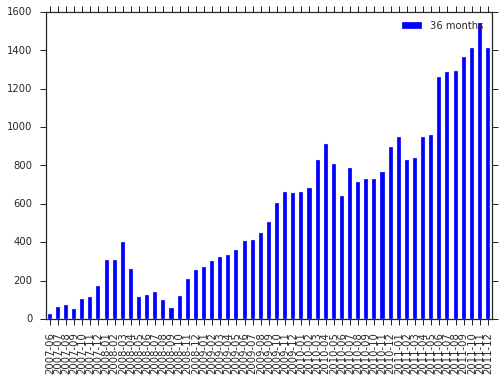

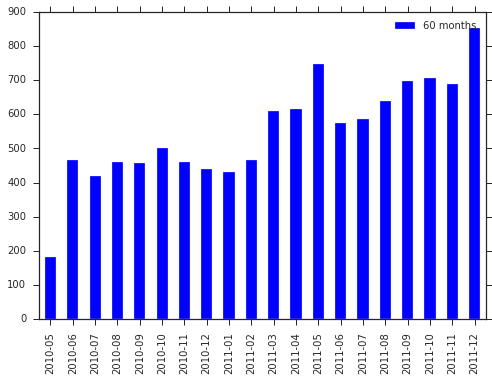

In [1018]:
for temp_df in [short_df, long_df]:
    issues = temp_df['issue_d'].value_counts(sort=False)
    issues.index = pd.PeriodIndex(issues.index.map(fix_issue_date))
    issues.sort_index().plot.bar(label=temp_df.name)
    # issues.sort_index().cumsum().plot(label='cumulative loans - {}'.format(temp_df.name))
    plt.legend()
    plt.show()

# Analyzing months which had higher ratio of non-payments

Paid       27658
Default     3876
All        31534
dtype: int64


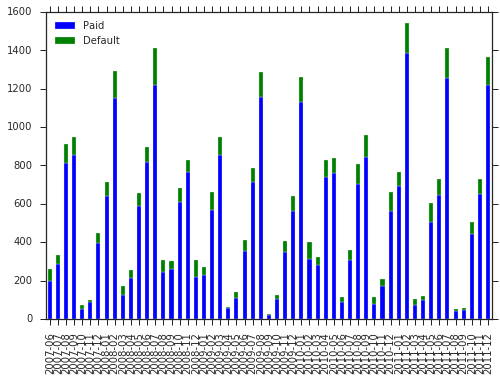

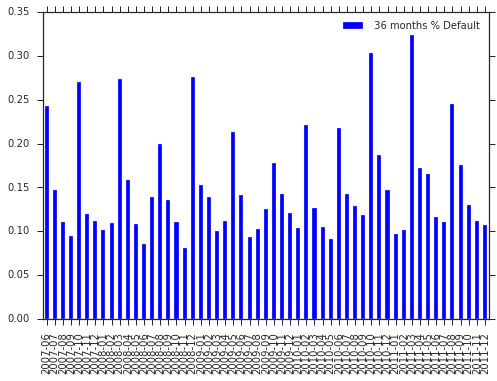

Paid        6481
Default     2468
All        11001
dtype: int64


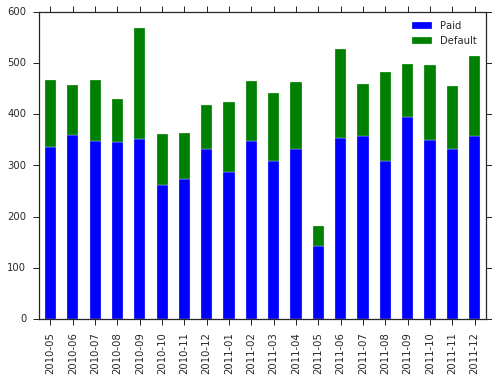

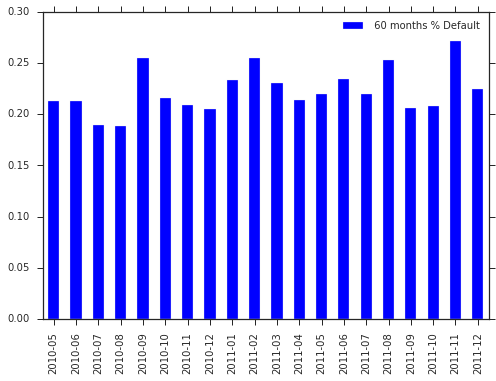

In [1019]:
for term in [' 36 months', ' 60 months']:
    term_df = historic[historic['term'] == term]
    paid = term_df[term_df['loan_status'] == 'Fully Paid']['issue_d'].value_counts()
    default = term_df[term_df['loan_status'].isin(['Charged Off', 'Default'])]['issue_d'].value_counts()
    all = term_df['issue_d'].value_counts()
    temp = pd.concat([paid, default, all], axis=1, keys=['Paid', 'Default', 'All'])
    temp.name = term
    temp.index = temp.index.map(lambda x: datetime.datetime.strptime(x, '%b-%y'))
    temp.index = pd.PeriodIndex(temp.index, freq='M').sort_values()
    print temp.sum()
    temp[['Paid', 'Default']].plot.bar(stacked=True)
    plt.show()
    (temp['Default'] / temp['All']).plot.bar(label='{} % Default'.format(term))
    plt.legend()
    plt.show()

# Begin 36-month-only analysis (more liquid / defaults due to shorter expiry)

In [1020]:
short_df.columns.sort_values()

Index([u'acc_now_delinq', u'addr_state', u'all_util', u'annual_inc',
       u'annual_inc_joint', u'application_type', u'collection_recovery_fee',
       u'collections_12_mths_ex_med', u'delinq_2yrs', u'desc', u'dti',
       u'dti_joint', u'earliest_cr_line', u'emp_length', u'emp_title',
       u'funded_amnt', u'funded_amnt_inv', u'grade', u'home_ownership', u'id',
       u'il_util', u'initial_list_status', u'inq_fi', u'inq_last_12m',
       u'inq_last_6mths', u'installment', u'int_rate', u'issue_d',
       u'last_credit_pull_d', u'last_pymnt_amnt', u'last_pymnt_d',
       u'loan_amnt', u'loan_status', u'max_bal_bc', u'member_id',
       u'mths_since_last_delinq', u'mths_since_last_major_derog',
       u'mths_since_last_record', u'mths_since_rcnt_il', u'next_pymnt_d',
       u'open_acc', u'open_acc_6m', u'open_il_12m', u'open_il_24m',
       u'open_il_6m', u'open_rv_12m', u'open_rv_24m', u'out_prncp',
       u'out_prncp_inv', u'policy_code', u'pub_rec', u'purpose', u'pymnt_plan',
      

# Creating y variables

In [1021]:
short_df['defaulted'] = pd.get_dummies(short_df['loan_status'])['Charged Off']

In [1022]:
short_df['profit'] = short_df['total_pymnt'] / short_df['funded_amnt']
short_df['annualized_profit'] = short_df['profit'] ** (1.0/3.0)
short_df['annualized_ten_percent'] = short_df['annualized_profit'] - 1.08#np.maximum(short_df['annualized_profit'] - 1.08, 0)

In [1023]:
short_df[['profit', 'annualized_profit', 'annualized_ten_percent']].head(5)

,profit,annualized_profit,annualized_ten_percent
0,1.172214,1.054393,-0.025607
1,1.251522,1.077654,-0.002346
2,1.222630,1.069297,-0.010703
3,1.126276,1.040435,-0.039565
4,1.312715,1.094940,0.014940


# Creating x variables

In [1024]:
short_df['inq_last_6mths'] = short_df['inq_last_6mths'].fillna(0)

In [1025]:
short_df['delinq_2yrs'] = short_df['delinq_2yrs'].fillna(0)

In [1026]:
short_df['verified'] = (~short_df['verification_status'].str.lower().str.contains('not')).astype(int)

In [1027]:
purpose_dummies = pd.get_dummies(short_df['purpose'])
purpose_dummies.columns = ['purpose_' + column for column in purpose_dummies.columns]
purposes = purpose_dummies.columns
for purpose in purposes:
    purpose_dummies[purpose] = purpose_dummies[purpose].astype(float)
short_df = pd.concat([short_df, purpose_dummies], axis=1)

In [1028]:
short_df['own_home'] = short_df['home_ownership'].isin(['MORTGAGE', 'OWN'])

In [1029]:
states_dummies = pd.get_dummies(short_df['addr_state'])
states_dummies.columns = ['state_' + column for column in states_dummies.columns]
states = states_dummies.columns
short_df = pd.concat([short_df, states_dummies], axis=1)

In [1030]:
latest = short_df['earliest_cr_line'].map(fix_issue_date).reindex()
short_df['issue_d'] = short_df['issue_d'].map(fix_issue_date).reindex()
short_df['credit_history'] = np.maximum((short_df['issue_d'] - latest), 1)

In [1031]:
import string
short_df['grade_int'] = short_df['grade'].apply(lambda x: string.lowercase.index(x.lower()))

In [1032]:
short_df['dti'] = short_df['dti'] / 100
for column in ['int_rate', 'revol_util']:
    short_df[column] = short_df[column].str.replace('%', '').astype(float) / 100

In [1033]:
short_df['emp_length'] = short_df['emp_length'].str.replace('n/a', '0').str.replace('<', '0').str.replace('+', '').str.split(' ').str[0]

In [1034]:
for column in ['id', 'member_id', 'loan_amnt', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 
               'revol_util', 'annual_inc', 'open_acc', 'total_acc', 'credit_history', 'emp_length', 'own_home',
               'pub_rec', 'installment']:
    short_df[column] = short_df[column].astype(float)
for column in ['loan_status']:
    short_df[column] = short_df[column].astype(str)

# Visualizing defaults as a binary variable

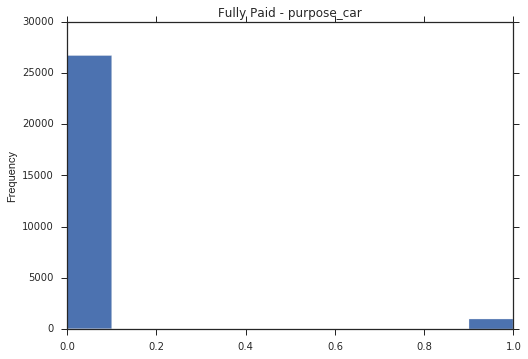

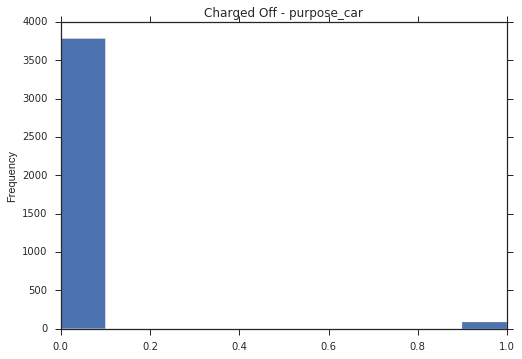

In [1035]:
for status in short_df['loan_status'].unique():
    column = 'purpose_car'
    short_df[short_df['loan_status'] == status][column].plot.hist(title=' - '.join([status, column]))#
    plt.show()

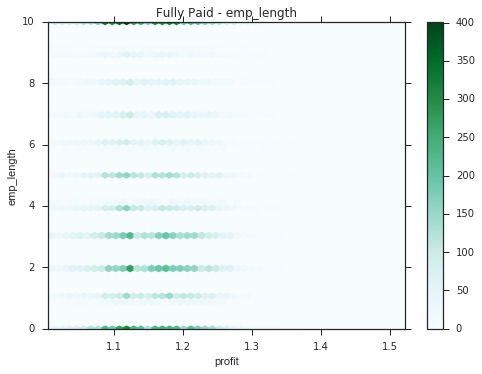

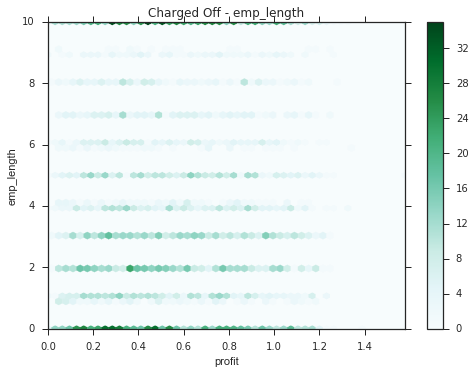

In [1036]:
for status in short_df['loan_status'].unique():
    column = 'emp_length'
    short_df[short_df['loan_status'] == status].plot.hexbin(x='profit', y=column, sharex=False, title=' - '.join([status, column]), gridsize=50)
    plt.legend()
    plt.show()

# Visualizing defaults as profit (growth of $1.0 - not yet annualized, but seems like better model)

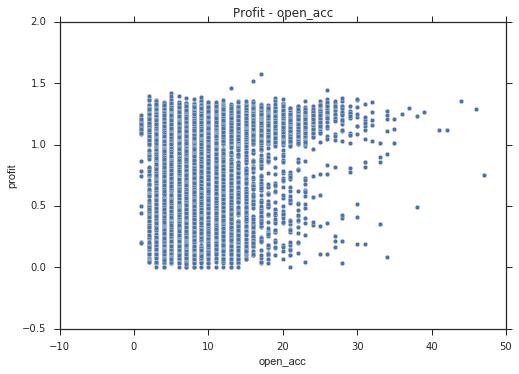

In [1037]:
column = 'open_acc'
#short_df.plot.hexbin(x=column, y='profit', sharex=False, title=' - '.join(['Profit', column]), gridsize=50)
short_df.plot.scatter(x=column, y='profit', title=' - '.join(['Profit', column]))

# Determine null variables

In [1038]:
for x in xs:
    if len(short_df[x].isnull().value_counts()) > 1:
        print x
        print short_df[x].isnull().value_counts()
        print '\n'

revol_util
False    31448
True        86
Name: revol_util, dtype: int64


annual_inc
False    31530
True         4
Name: annual_inc, dtype: int64


open_acc
False    31505
True        29
Name: open_acc, dtype: int64


total_acc
False    31505
True        29
Name: total_acc, dtype: int64


pub_rec
False    31505
True        29
Name: pub_rec, dtype: int64




# Fill null variables where plausible

In [1039]:
short_df['pub_rec'] = short_df['pub_rec'].fillna(0)
short_df['total_acc'] = short_df['total_acc'].fillna(0)
short_df['annual_inc'] = short_df['annual_inc'].fillna(short_df['annual_inc'].mean())
short_df['open_acc'] = short_df['open_acc'].fillna(short_df['open_acc'].mean())
short_df['revol_util'] = short_df['revol_util'].fillna(short_df['revol_util'].median())
short_df['mths_since_last_delinq'] = short_df['mths_since_last_delinq'].fillna(0)

# Analyze null variables (see if just old or what)

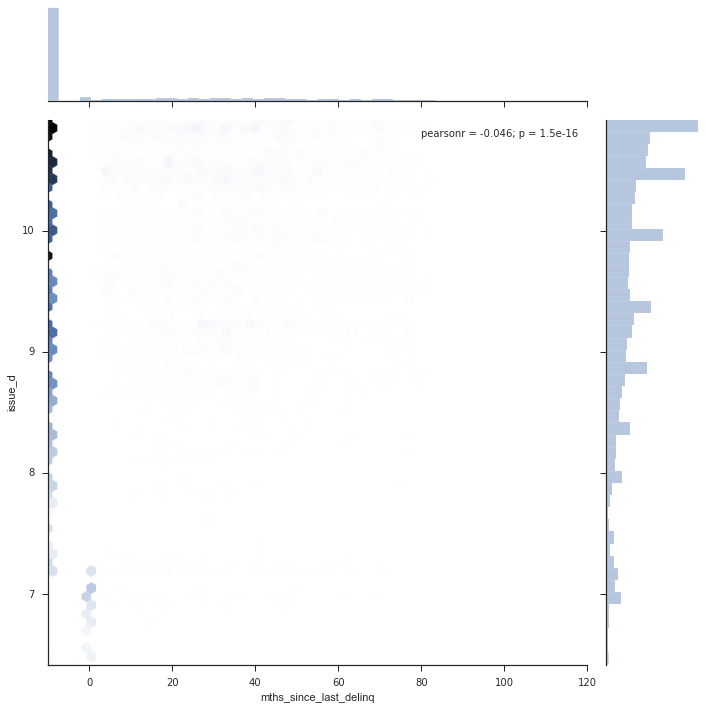

In [1040]:
sns.jointplot(short_df['mths_since_last_delinq'].fillna(-10), (short_df['issue_d'] - pd.Period('20010101', freq='M')) / 12, kind='hexbin', size=10)

In [1041]:
# short_df.groupby(short_df['mths_since_last_delinq'].isnull()).get_group(False)['mths_since_last_record']

# Variables for ols (proxy for future ML)

In [1059]:
xs = [
    'dti', 
    # 'int_rate',
    'loan_amnt', 
    # 'mths_since_last_delinq', 
    # 'mths_since_last_record',
    # 'mths_since_last_major_derog',
    'revol_bal',
    'revol_util',
    'annual_inc',
    'open_acc',
    'total_acc',
    'pub_rec',
    'grade_int',
    'credit_history',
    'emp_length',
    'verified',
    'own_home',
    'installment',
    'delinq_2yrs',
    'inq_last_6mths',
] + purposes.tolist() + states.tolist()

y = [
    #'defaulted',
    'profit',
    'annualized_profit'
]
short_df.pipe(df_ols, y='profit', x=xs)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <dti> + <loan_amnt> + <revol_bal> + <revol_util> + <annual_inc>
             + <open_acc> + <total_acc> + <pub_rec> + <grade_int> + <credit_history>
             + <emp_length> + <verified> + <own_home> + <installment>
             + <delinq_2yrs> + <inq_last_6mths> + <purpose_car> + <purpose_credit_card>
             + <purpose_debt_consolidation> + <purpose_educational>
             + <purpose_home_improvement> + <purpose_house> + <purpose_major_purchase>
             + <purpose_medical> + <purpose_moving> + <purpose_other>
             + <purpose_renewable_energy> + <purpose_small_business> + <purpose_vacation>
             + <purpose_wedding> + <state_AK> + <state_AL> + <state_AR> + <state_AZ>
             + <state_CA> + <state_CO> + <state_CT> + <state_DC> + <state_DE>
             + <state_FL> + <state_GA> + <state_HI> + <state_IA> + <state_ID> + <state_IL>
             + <state_IN> + 

# Try to model annualized profit

In [1045]:
model_vs_actual.model.isnull().value_counts() # will go back and find nan variable causing this

False    31534
Name: model, dtype: int64

In [1053]:
model_vs_actual[model_vs_actual['model'] > 0.2].shape

(4544, 2)

# Defaults regression

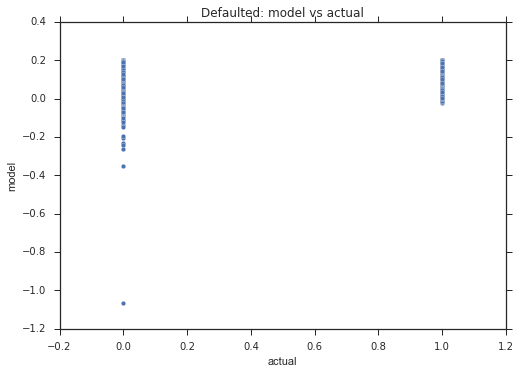

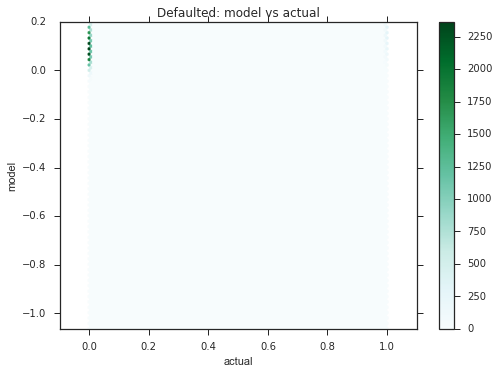

(-0.1, 1.1)

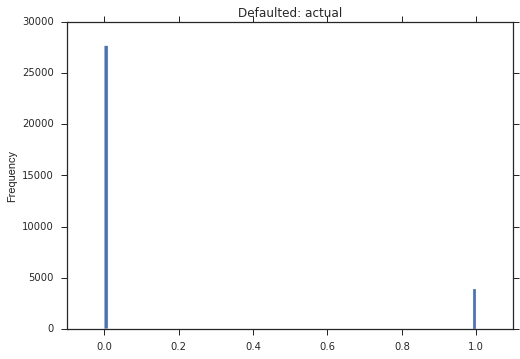

In [1055]:
m_t = model_threshold = 0.2
model_vs_actual = pd.concat([short_df.pipe(df_ols, y='defaulted', x=xs).y_predict, short_df['defaulted']], axis=1, keys=['model', 'actual'])
model_vs_actual[model_vs_actual['model'] < m_t].plot.scatter('actual', 'model', sharex=False, title='Defaulted: model vs actual')
model_vs_actual[model_vs_actual['model'] < m_t].plot.hexbin('actual', 'model', sharex=False, title='Defaulted: model vs actual')
plt.xlim([-0.1, 1.1])
plt.show()
model_vs_actual['actual'].plot.hist(bins=100, title='Defaulted: actual')
plt.xlim([-0.1, 1.1])

In [1056]:
# Annualized Profit regression

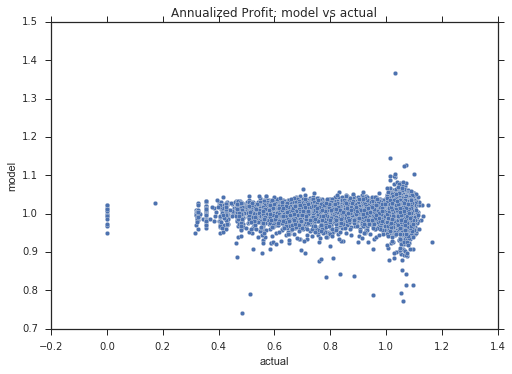

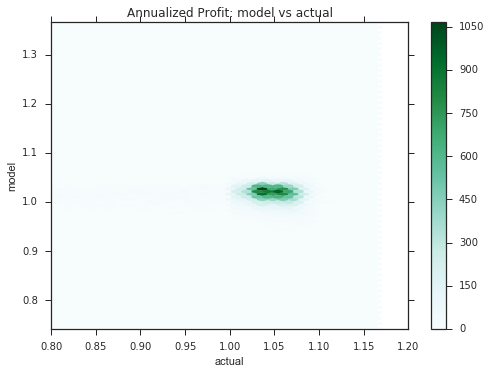

(0.8, 1.2)

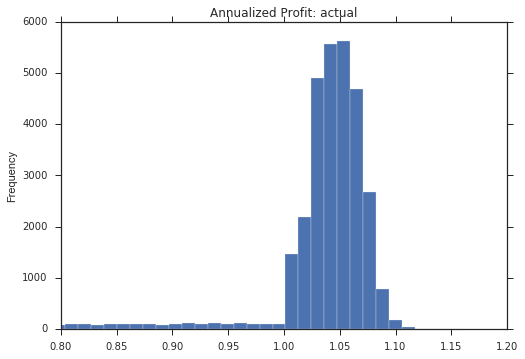

In [1057]:
model_vs_actual = pd.concat([short_df.pipe(df_ols, y='annualized_profit', x=xs).y_predict, short_df['annualized_profit']], axis=1, keys=['model', 'actual'])
model_vs_actual[model_vs_actual['model'] > 0.5].plot.scatter('actual', 'model', sharex=False, title='Annualized Profit: model vs actual')
model_vs_actual[model_vs_actual['model'] > 0.5].plot.hexbin('actual', 'model', sharex=False, title='Annualized Profit: model vs actual')
plt.xlim([0.8, 1.2])
plt.show()
model_vs_actual['actual'].plot.hist(bins=100, title='Annualized Profit: actual')
plt.xlim([0.8, 1.2])

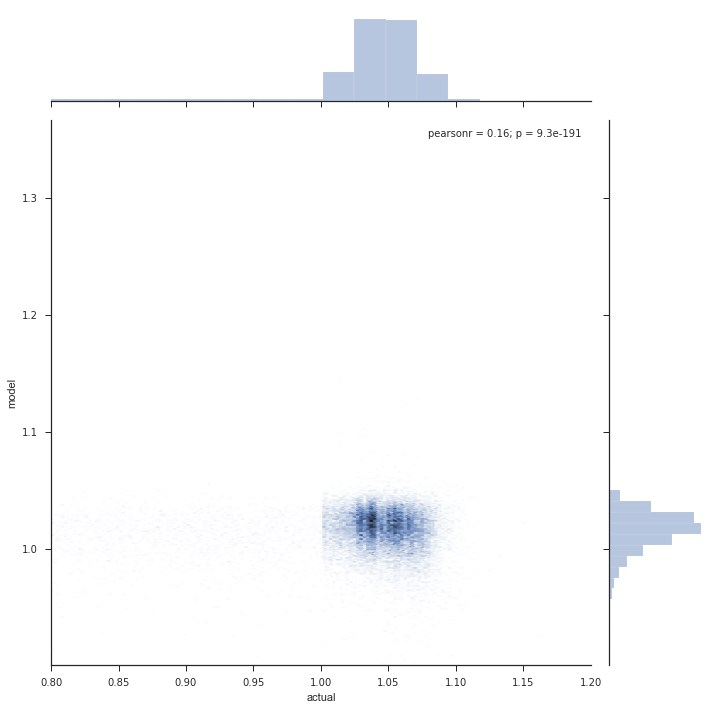

In [1058]:
m_v_a = (model_vs_actual[model_vs_actual['model'] > 0.9])
sns.jointplot(m_v_a['actual'], m_v_a['model'], kind='hexbin', size=10, xlim=[0.8, 1.2])

# Try a threshold (e.g. only consider our desired class to be > 8% returns)

In [890]:
model_vs_actual = pd.concat([short_df.pipe(df_ols, y='annualized_ten_percent', x=xs).y_predict, short_df['annualized_ten_percent']], axis=1, keys=['model', 'actual'])

In [891]:
model_vs_actual = model_vs_actual + 1.08

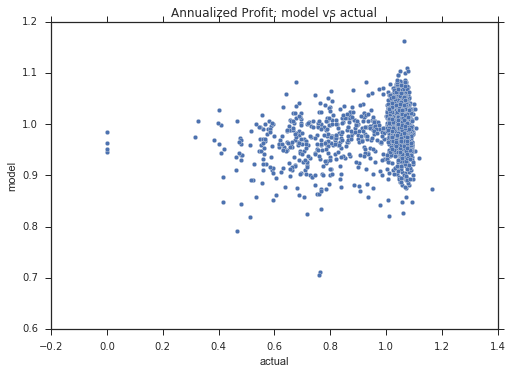

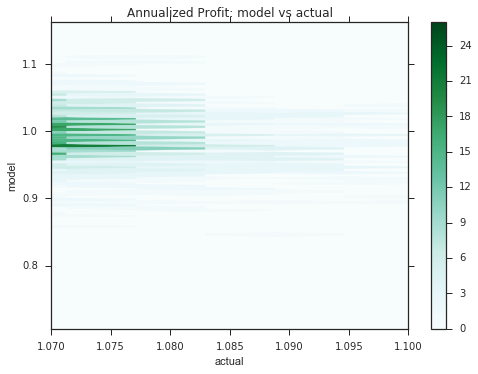

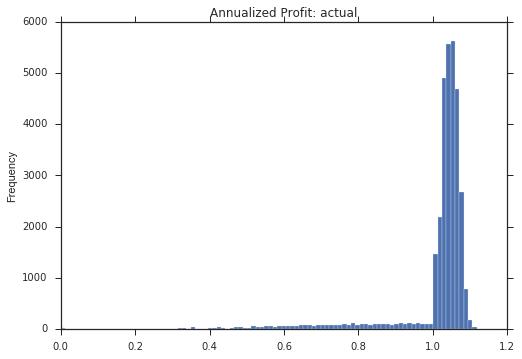

In [892]:
model_vs_actual.plot.scatter('actual', 'model', sharex=False, title='Annualized Profit: model vs actual')
model_vs_actual.plot.hexbin('actual', 'model', sharex=False, title='Annualized Profit: model vs actual')
plt.xlim([1.07, 1.10])
plt.show()
model_vs_actual['actual'].plot.hist(bins=100, title='Annualized Profit: actual')